## 401K Optimization Using Modern Portfolio Theory

*By Stephanie Wu*

I've often talked about the benefits of computer programming and using technology in Finance to develop more sophisticated trading strategies. Such strategies usually require a unique understanding of mathematics, data science, and statistics; paired along with a rudimentary knowledge of machine learning and programming.

Because of these significant learning curves, maybe algorithmic trading isn't the way to go. As such, we're simply going to purchase $100,000 worth of an asset class and not worry about what investment strategy we're going to adopt. We've got the easy part figured out. The hard part is figuring out how much to purchase of one asset over another. How do you figure this out? Do we need to conduct lots of research? Maybe. Or maybe not. With a little help with technology, the answers may be more simple than we think. 

### Modern Portfolio Theory (MPT)

The **Modern Portfolio Theory** conceptualizes how investors (who are risk-averse) construct portfolios that maximize their expected returns for given levels of risk. This provides us with the insight of how risk and return characteristics of various investments need not be isolated but analyzed of how individual investments affect the performance of a portfolio. The assumptions of MPT, thus, emphasize that investors only assume the additional risk when there is a possibility of higher expected returns.

The pioneer of the Modern Portfolio Theory (MPT) was developed by Financial Economist Harry Markowitz's, with his paper *Portfolio Selection* (1952). He eventually won a Nobel Memorial Price in 1990 in Economic Sciences for his contribution to the field. To this day, MPT is taught around the world in practically every finance curriculum. The implications for MPT has laid the groundwork for many of the assumptions investors have when constructing portfolios.

The assumptions of MPT are as follows:

- Investors are rational and avoid risk whenever possible
- Investors aim for the maxmium returns for their investment
- All investors share the aim of maximizing their expected returns
- Commissions and taxes on the market are left out of the consideration
- All investors have access to the same sources and level of all necessary information about investment decisions
- Investors have unlimited access to borrow and lend money at the risk-free rate

The fundamental aspect of this theory is the possibility for investors to construct an "efficient set of portfolios," which is also known as an "Efficient Frontier." These efficient portfolios offer the maximum expected returns for a given level of risk. An investor's tolerance for risk determines the type of "efficient portfolio" constructed by the investor. 

An investor which the lowest tolerance would opt for a portfolio that offers the maximum expected return, given the lowest possible risk, and vice versa.

The diagram below gives an example of the concept of Efficient Frontier:

![Efficient Frontier](https://socraticallystephie.com/project/401k-optimization-using-modern-portfolio-theory/efficient_frontier_hufb6cecfc1858aea9fc23a25a84129218_51410_1200x1200_fit_q75_h2_lanczos.webp)

Different securities post different expected returns.

### Diversification

One of the most essential topics utilized after Markowitz's Modern Portfolio Theory was the concept of diversification. By merely constructing portfolios with different combinations of securities, investors could achieve a maximum expected return, given their risk preferences. This is due to the fact that the returns of a portfolio are greatly affected by the nature of the relationship between assets and their weights in the portfolio.

An investor can reduce portfolio risk simply by holding combinations of instruments which are not perfectly positively correlate (correlation coefficient $-1\leq\rho_{ij}<1$). In other words, investors can reduce their exposure to individual asset risk by holding a diversified portfolio of assets.

Diversification may allow for the same portfolio expected return with reduced risk. These ideas have been started with Markowitz and then reinforced by other economists and mathematicians such as Andrew Brennan who have expressed ideas in the limitation of variance through portfolio theory.

If all the asset pairs have correlations of 0 -- they are perfectly uncorrelated -- the portfolio's return variance is the sum over all assets of the square of the fraction held in the asset times the asset's return variance.

### Modern Portfolio Theory with Python

Most people are familiar with what 401(k)s are. They're what are known as defined-contribution plans, which the employee and employer can contributions to an investment account. This is not to be confused with pensions, or a defined-benefit plan, which only the employer is responsible for making contributions.

Not only are employees responsible for contributing to their investment accounts, but they're also responsible for choosing the specific investments within their 401(k). This selection usually includes an assortment of stock and bond mutual funds.

It's consider the following mutual funds: **T. Rowe Price Tax-Efficient Equity Fund (PREFX)**, **Janus Henderson Forty Fund Class T (JACTX)**, **Sextant Growth Fund (SSGFX)**, and **Commerce Growth Fund (CFGRX)**. PREFX, JACTX, SSGFX, and CFGRX have acquired a 5-year average annual return of 14.33%, 15.93%, 10.23%, and 14.82% respectively. We want to allocate a modest amount of $10,000 into our contribution account (most likely over a certain period). How would we accomplish this? 

Do we allocate $10,000 equally among the four mutual funds? Perhaps it is better to allocate a majority of our initial investment in the fund that has accumulated the highest 5-year average annual return.

With a little help of Python, the Modern Portfolio Theory can help us establish an optimal portfolio for our 401(k) contributions.

#### Importing The Data

We can start by important the necessary packages for this project. `numpy` allows us to conduct numerical computation on python arrays and dataframes, while `pandas` allows us to manipulate dataframes easily. Considering that we'll be using dataframes of asset prices, this module will be essential.

The module `fix_yahoo_finance` will allow us to extract the necessary asset price information from the Yahoo Finance API (provided that it still works from the time this is read by the view). `matplotlib` is used for visualizations, which we will use for illustrate MPT.

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import scipy.optimize as sco

import seaborn as sns; sns.set(style="whitegrid")
np.random.seed(777)

We will also be utilizing two other modules in our project. The `datetime` module provides classes that allows us to manipulate date objects which will be required in our asset class extraction. `relativedelta` from the `dateutil` module provides extra functionality, such as timedeltas that are expressed in units larger than a day.

We will work with a 5 year time frame.

In [2]:
import datetime
from dateutil.relativedelta import relativedelta

end = datetime.date(2018,10,30)
beg = end - relativedelta(years = 2)

#### Mutual Fund Selection

We're also going to select 5 of the best performing mutual funds as of September 2019. These mutual funds consist of large-cap, mid-cap, small-cap, international equities, and fixed income. The following list is aquired through the [American Association for Individual Investors](https://www.nerdwallet.com/blog/investing/best-performing-mutual-funds/). Who can also acquire mutual fund information from [Morningstar](https://www.morningstar.com). If you're unfamiliar with what mutual funds are or how they work, [Vanguard](https://investor.vanguard.com/mutual-funds/) has a very good primer on investing with mutual funds.

- ProFunds Semiconductor UltraSector Fund Investor Class (SMPIX)
- PRIMECAP Odyssey Aggressive Growth Fund (POAGX)
- Oberweis Micro-Cap Fund (OBMCX)
- Oberweis International Opportunities Fund (OBIOX)
- Fairholme Focused Income Fund (FOCIX)

All of the following funds have YTD and 5-year average annual return above 20% and 10% respectively. We will extract a list of historical prices of these tickers going back 5 years, and merge them into a single dataframe.

In [3]:
# Setting the tickers and extracting the historical price data

ticks = ["SMPIX", "POAGX", "OBMCX", "OBIOX", "FOCIX"]

df = pd.DataFrame(yf.download(ticks, start=beg, end=end)['Adj Close'])

[*********************100%***********************]  5 of 5 completed


#### Visualizing the Data

We want to get an idea of the price fluctations of the different assets we have extracted. The following code will allow us to plot the dataframe of mutual funds.

Text(0.5, 1.0, 'Historical Prices of Mutual Funds')

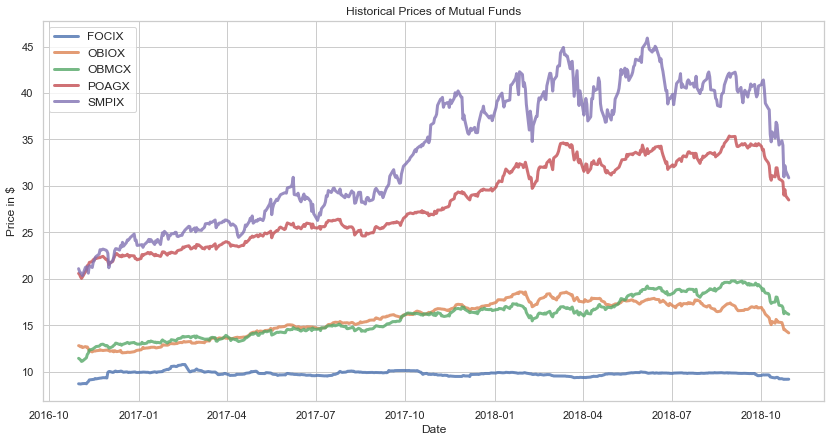

In [4]:
plt.figure(figsize=(14, 7))
for c in df.columns.values:
    plt.plot(df.index, df[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('Price in $')
plt.xlabel('Date')
plt.title('Historical Prices of Mutual Funds')

As we can see, the asset prices for various different mutual funds range from $50 to only a few dollars. The volatility is also different among our select mutual fund group; however, this may be difficult to see while its presented in the form of a time series. We can create a code that allows us to visualize the volatility of our time series.

Text(0.5, 1.0, 'Volatility of Mutual Funds')

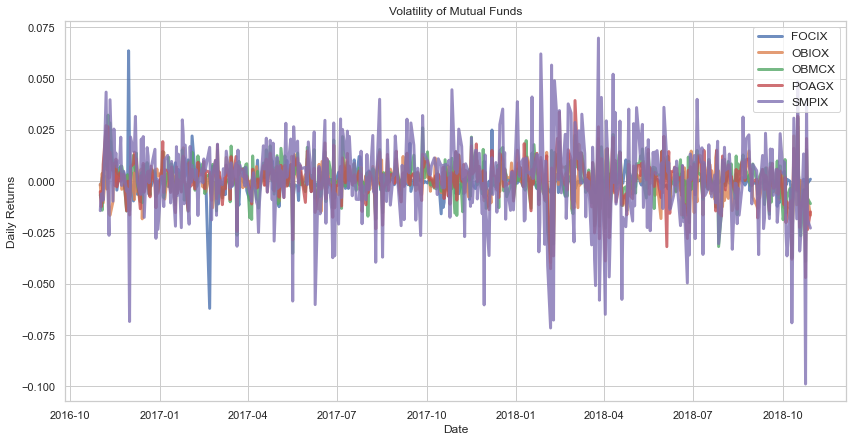

In [5]:
returns = df.pct_change()

plt.figure(figsize=(14,7))
for c in returns.columns.values:
    plt.plot(returns.index, returns[c], lw=3, alpha=0.8, label=c)
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('Daily Returns')
plt.xlabel('Date')
plt.title('Volatility of Mutual Funds')

As we can see from the plot, the ProFunds Semiconductor UltraSector Fund Investor Class (SMPIX) mutual fund is highly volatile. Other mutual funds, while not as volatile, exhibit periods of strong variability. But why is this important? Later on, we will use our understanding of our volatility to calculate the risk-reward trade-off for our select mutual fund portfolio.

### Risk and Expected Return

MPT assumes that investors are risk-averse, meaning that given two portfolios that offer the same expected return, investors will prefer the less risky one. Thus, an investor will take on increased risk only if compensated by higher expected highers.

Conversely, an investor who wants higher expected returns must accept more risk. The exact trade-off will be the same for all investors, but different investors will evaluate the trade-off differently based on individual risk aversion characteristics. The implication is that a rational investor will not invest in a portfolio if a second portfolio exist with more favorable risk-epected return profile.

The theroy uses the standard deviation of return as a proxy for risk, which is valid if asset returns are jointly normally distributed. 

While the portfolio return is the proption-weighted combination of the constituent assets' returns, the portfolio volatility is a function of the correlation, $\rho_{ij}$, of the component asset, for all asset pairs.

In general, the expected return, noted by the following formula.

$$E(R_{p})=\sum_{i}w_{i}E(R_{i})$$

where:

- $R_{p}$ is the return on the portfolio
- $R_{i}$ is the return on assets a particular asset
- $w_{i}$ is the weighting component of a particular asset.

The portfolio return variance is denoted by the following.

$$\sigma_{p}^{2}=\sum_{i}w_{i}^{2}\sigma_{i}^{2}+\sum_{i}\sum_{j\neq i}w_{i}w_{j}\sigma_{i}\sigma_{j}\rho_{ij}$$

where:

- $\rho_{ij}$ is the correlation between the returns on asset i and j

Of course, the portfolio return volatility is merely the standard deviation of the porfolio return variance, such that $\sigma_{p}=\sqrt{\sigma_{p}^{2}}$.

We can adjust the formula to adopt two asset portfolio:

- **Portfolio return:**  $\ w_{A}E(R_{A})+w_{B}E(R_{B})$
- **Portfolio variance:**  $\ \sigma_{p}^{2}=w_{A}^{2}\sigma_{A}^{2}+w_{B}^{2}\sigma_{B}^{2}+2w_{A}w_{B}\sigma_{A}\sigma_{B}\rho_{AB} $

We can also do the same for the three asset portfolio:

- **Portfolio return: ** $\ w_{A}E(R_{A})+w_{B}E(R_{B})+w_{C}E(R_{C})$
- **Portfolio variance: ** $\ \sigma_{p}^{2}=w_{A}^{2}\sigma_{A}^{2}+w_{B}^{2}\sigma_{B}^{2}+w_{C}^{2}\sigma_{C}^{2}+2w_{A}w_{B}\sigma_{A}\sigma_{B}\rho_{AB}+2w_{A}w_{C}\sigma_{A}\sigma_{C}\rho_{AC}+2w_{B}w_{C}\sigma_{B}\sigma_{C}\rho_{BC}$

#### Constructing Random Portfolios

Now we will begin with the construction of many different random portfolios. Why do we need a bunch of random portfolios? As mentioned previously, the purpose of the efficient frontier is to come up with a set of optimal portfolios that offer the highest return for their defined level of risk. As such, we would need to come up with many different portfolios that potentially provide us with the highest return (if we're risk-seeking) or the lowest risk (if we're risk-averse).

We're already defined the formulas for portfolio return and variance. We can create a function that allows us to calculate these variables for our mutual fund.

In [6]:
def portfolio_annualized_performance(weights, mean_returns, cov_matrix):
    
    # Calculates portfolio returns with the assigned number of weights
    returns = np.sum(mean_returns*weights ) *252
    # Calculates the portfolio standard deviation with the number of weights and the 
    # calculated covariance of each portfolio pair
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    # returns the portfolio standard deviation and portfolio returns
    return std, returns

You may be asking we we have multiplied the portfolio returns and variance by 252. We do this to annualize our variables. Asset prices are highly unpredictable, as they tend to change considerably through each day. It would be more benefitial for us to use the returns and variance over a specified time period, not just based on a single instance in time.

Then why multiply these variables by 252, instead of 365. While the number of trading days tend to vary through each year and from country to country, in the United States, there are an average of 252 trading days in a year.

Also, keep in mind that we will not be using this function to construct our efficient portfolios directly. Rather, we will be using this function as a small part of a much larger function.

In [7]:
#Generates portfolios with random weights assigned to each stock

# Creates a function that takes four arguments: number of portfolioes, average asset returns
# covariance of asset pairs and the risk free rate

def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    
    # Creates an array, which will hold three parameters: standard deviations, returns, sharpe ratio
    results = np.zeros((3,num_portfolios))
    
    # Creates an empty list called 'weights_record'
    weights_record = []
    
    # loops the following for the number of portfolios
    for i in range(num_portfolios):
        
        # Creates a random weight for each mutual fund, sums them, then appends them to 'weights_record'
        weights = np.random.random(len(ticks))
        weights /= np.sum(weights)
        weights_record.append(weights)
        
        # unpackages the returned results of 'portfolio_annualized_performance' funciton, then assigns the result
        # to list called 'results'
        portfolio_std_dev, portfolio_return = portfolio_annualized_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        
        # calculates the sharpe ratio from the previous results
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record

As such, we will use the following function to calculate our list of random portfolios. We believe 500,000 random portfolios should be sufficient. We also need the risk free rate to calculate our sharpe ratio.

The **Sharpe ratio** measures the performance of an investment compared to a risk-free asset, after adjusting for its risk. The sharpe ratio can be calculated by the following:

$$Sharpe\ Ratio\ =\ \frac{R_{p}-R_{f}}{\sigma_{p}}  $$

As for the **risk-free rate**, it represents the rate of a hypothetical investment with no risk of financial loss, over a specific period of time. Since this rate cannot produce losses for the investor, any other investment would need to produce a higher return in order to induce investors to hold it. 

The 10-Year Treasury Note can be considered a proxy for the risk-free rate. At the time of writing this, the yield on the 10-Year Treasury is 3.10%.

In [8]:
returns = df.pct_change()
mean_returns = returns.mean()
cov_matrix = returns.cov()
num_portfolios = 500000
risk_free_rate = 0.031078

Now we will create a function that displays our efficient frontier.

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualized Return: 0.18
Annualized Volatility: 0.15


            FOCIX  OBIOX  OBMCX  POAGX  SMPIX
allocation   0.79   0.69  68.18  28.91   1.43
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualized Return: 0.05
Annualized Volatility: 0.08


            FOCIX  OBIOX  OBMCX  POAGX  SMPIX
allocation  59.23  32.98   4.97   2.59   0.23


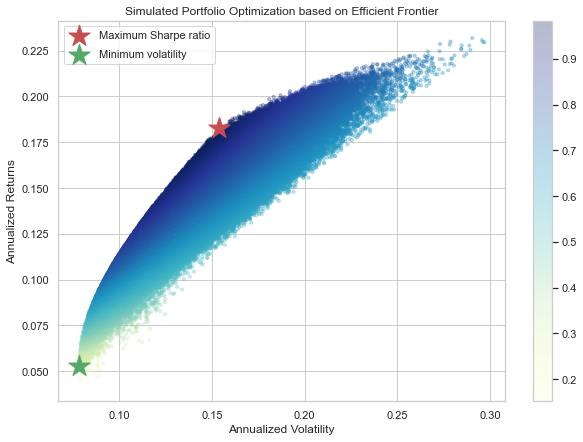

In [9]:
# create a function that takes four arguments

def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    
    # unpacks the results of the 'random_portfolios' function into the 'results' and 'weights' variables
    results, weights = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    # takes the largest sharpe ratio from the results array and assigns it to 'max_sharpe_idx'
    max_sharpe_idx = np.argmax(results[2])
    
    # assigns the portfolio standard deviation and return to std and rp
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    
    # creates a new dataframe of different portfolio weights with the maximum sharpe ratio
    # assigns a random allocation for each portfolio weight
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=df.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T

    # creates a new dataframe of different portfolio weights with the minimum volatility ratio
    # assigns a random allocation for each portfolio weight
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=df.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    # Uses the parameters above to locate the highest sharpe ratio and displays it with a red star sign
    # Does the same with the minimum volatility portfolio, and displays it with a green star on the plot
    print( "-"*80)
    print( "Maximum Sharpe Ratio Portfolio Allocation\n")
    print( "Annualized Return:", round(rp,2))
    print( "Annualized Volatility:", round(sdp,2))
    print( "\n")
    print( max_sharpe_allocation)
    print( "-"*80)
    print( "Minimum Volatility Portfolio Allocation\n")
    print( "Annualized Return:", round(rp_min,2))
    print( "Annualized Volatility:", round(sdp_min,2))
    print( "\n")
    print( min_vol_allocation)

    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('Annualized Volatility')
    plt.ylabel('Annualized Returns')
    plt.legend(labelspacing=0.8)
    
display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)

As you can see, for a maximum return portfolio, we would need to allocate two-thirds of our budget on **Oberweis Micro-Cap Fund (OBMCX)**. If you take a second look at the daily returns image that we've plotted earlier, you can see that OBMCX is very volatile. For the best return, our algorithm tells us that we should allocate a signficant portion of our budget to **PRIMECAP Odyssey Aggressive Growth Fund (POAGX)** as well. For a minimum risk portfolio, we can see that about 60% of our budget is allocated to **Fairholme Focused Income Fund (FOCIX)**. 

### Efficient Frontier

We can see that the plot of the randomly selected simulated portfolios forms the shape of an arch line on the top of clustered blue dots. This line is referred to as the efficient frontier. We've used the term "efficient" quite often, but why is it considered efficient? It's because the points along the line will give you the lowest risk for a given target return. All other dots below or to the right of the line will offer the same returns for more risk, or they offer less returns for the same amount of risk

We found the two optimal portfolios by simulating many possible random choices and picking the best ones (either minimum risk or maximum risk-adjusted return). We can also implement this by using **Scipy's optimize function**.

If you're an advanced Microsoft Excel user, you might be familiar with the solver function in Excel. Scipy's optimize function is doing a similiar task when we are chosing what to optimize, as well as the constraints and the bounds.

In [10]:

# Creating a function for the negative sharpe ratio. Has similiar parameters, with the exception that the results are negative
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    p_var, p_ret = portfolio_annualized_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

# Defines a function that takes three arguments
def max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate):
    
    # takes the number of assets and assigns to variable "num_assets"
    num_assets = len(mean_returns)
    
    # takes the arguments from the function and assigns to variable "args"
    args = (mean_returns, cov_matrix, risk_free_rate)
    
    # this variable will be read by our scipy minimize function, which basically states that the sum of x should equal 1
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    
    # bounds determine the limit assigned by random weights, stating that each weight should be between 0 and 1 inclusively
    bound = (0.0,1.0)
    
    # creates tuple of bounds for each of our 5 assets
    bounds = tuple(bound for asset in range(num_assets))
    
    # finds the maximum sharpe ratio and assigns the value to a variable called "result"
    result = sco.minimize(neg_sharpe_ratio, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result

From here on out, we will use the Scipy's optimize function to determine the maximum Sharpe ratio portfolio. However, there is no 'maximize' option in the Scipy's optimize function. So as an objective function, we need to pass something that should be minimized. That is why we have created the function `neg_sharpe_ratio` for computing the negative Sharpe ratio. We use this as our objective to minimize. 

Essentially, we want our function to return a negative sharpe ratio because the minimum value that our function function gives us would be the maximum sharpe ratio, which is what the function `max_sharpe_ratio` will provide us. We first define arguments (this should not include the variables you would like to change for optimization, in this case, "weights").

In [11]:
# provides the annualized volatility, which is first value of the returned index
def portfolio_volatility(weights, mean_returns, cov_matrix):
    return portfolio_annualized_performance(weights, mean_returns, cov_matrix)[0]

# creates a function with two arguments
def min_variance(mean_returns, cov_matrix):
    
    # takes the number of assets and assigns to variable "num_assets"
    num_assets = len(mean_returns)
    
    # takes the two arguments and assigns them to the variable "args"
    args = (mean_returns, cov_matrix)
    
    # this variable will be read by our scipy minimize function, which basically states that the sum of x should equal 1
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    
    # bounds determine the limit assigned by random weights, stating that each weight should be between 0 and 1 inclusively
    bound = (0.0,1.0)
    
    # creates tuple of bounds for each of our 5 assets
    bounds = tuple(bound for asset in range(num_assets))
    
    # finds the maximum sharpe ratio and assigns the value to a variable called "result"
    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)

    return result

We can also define an optimizing function for minimizing volatility. This time, we really do want a minimize objective function, so we don't need to get creative like we did with the `max_sharpe_ratio` function. While we are trying to minimize volatility by trying different weights, the contraints and bounds are the same as before.

In [12]:

# creates a function that takes three arguments
def efficient_return(mean_returns, cov_matrix, target):
    
    # takes the number of each asset and assigns to a variable called "num_assets"
    num_assets = len(mean_returns)
    
    # assigns the arguments of the function to a variable called "args"
    args = (mean_returns, cov_matrix)
    
    # calls the "portfolio_return" function and returns only portfolio_returns
    def portfolio_return(weights):
        return portfolio_annualized_performance(weights, mean_returns, cov_matrix)[1]
    
    # establishes our contrains for the efficient portfolio line
    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return(x) - target},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0,1) for asset in range(num_assets))
    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return result

# creates a function that takes three arguments
def efficient_frontier(mean_returns, cov_matrix, returns_range):

    # creates an empty list called "efficients"
    efficients = []
    
    # creates a for loop that calculates the efficient return and appends them to the empty list "efficients" 
    for ret in returns_range:
        efficients.append(efficient_return(mean_returns, cov_matrix, ret))
    return efficients

Now we want to draw a line that depicts where efficient portfolios for a given level of risk. The functions above are to help compute efficient frontier. The first function, `efficient_return`, is calculating the most efficient portfolio for a given target return, and the second function `efficient_frontier` will take a range of target returns and compute efficient portfolio for each return level.

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualized Return: 0.18
Annualized Volatility: 0.16


            FOCIX  OBIOX  OBMCX  POAGX  SMPIX
allocation    0.0    0.0  76.72  23.28    0.0
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation
Annualized Return: 0.05
Annualized Volatility 0.08


       allocation
FOCIX       58.63
OBIOX       33.93
OBMCX        7.44
POAGX        0.00
SMPIX        0.00


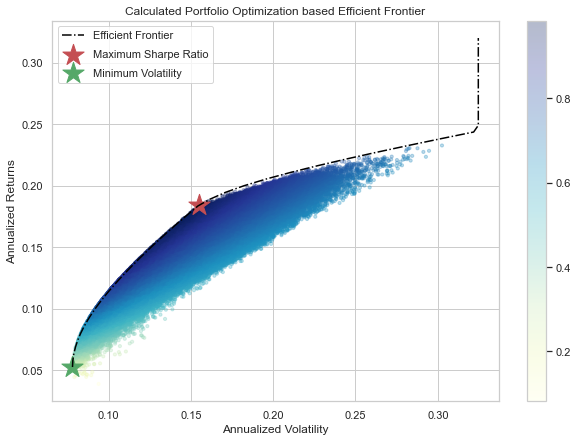

In [13]:

# Creates a function that takes four arguments
def display_calculated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    
    # puts the results in the "random_portfolios" function. Extracts the results in a variable called "results"
    results, _ = random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate)

    # takes three of the arguments in a function called "max_sharpe_ratio". Assigns the results in a variable called "max_sharpe"
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)

    # takes the "max_sharpe" variable and puts it in the "portfolio_annualized_performance". unpackages the results in two variables
    sdp, rp = portfolio_annualized_performance(max_sharpe['x'], mean_returns, cov_matrix)
    
    # creates a new dataframe of different portfolio weights with the maximum sharpe ratio
    # assigns a random allocation for each portfolio weight
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x, index=df.columns, columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100, 2) for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T

    # creates a new dataframe of different portfolio weights with the minimum volatility ratio
    # assigns a random allocation for each portfolio weight
    min_vol = min_variance(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_annualized_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x, index=df.columns, columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2) for i in min_vol_allocation.allocation]

    print( '-'*80)
    print( 'Maximum Sharpe Ratio Portfolio Allocation\n')
    print( 'Annualized Return:', round(rp,2))
    print( 'Annualized Volatility:', round(sdp,2))
    print( '\n')
    print( max_sharpe_allocation)
    print( '-'*80)
    print( 'Minimum Volatility Portfolio Allocation')
    print( 'Annualized Return:', round(rp_min,2))
    print( 'Annualized Volatility', round(sdp_min,2))
    print( '\n')
    print( min_vol_allocation)

    plt.figure(figsize = (10,7))
    plt.scatter(results[0,:], results[1,:], c=results[2,:], cmap='YlGnBu', marker='o', s=10, alpha = 0.3)
    plt.colorbar()
    plt.scatter(sdp,rp, marker='*', color='r',s=500, label='Maximum Sharpe Ratio')
    plt.scatter(sdp_min, rp_min, marker='*', color ='g', s = 500, label = 'Minimum Volatility')

    target = np.linspace(rp_min, 0.32, 50)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)
    plt.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color = 'black', label = 'Efficient Frontier')
    plt.title('Calculated Portfolio Optimization based Efficient Frontier')
    plt.xlabel('Annualized Volatility')
    plt.ylabel('Annualized Returns')
    plt.legend(labelspacing = 0.8)

display_calculated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)

We have almost the same result as what we have simulated by picking from randomly generated portfolios. The slight difference is that the Scipy's "optimize" function has not allocated any budget for FOCIX, OBIOX, or SMPIX for the maximum sharpe ratio. For the minimum volatility, our algorithm tells us that we should allocate 59.11% in FOCIX, 33.76% in OBIOX, and 7.14% in OBMCX, while allocating nothing in the other two mutual funds.

### Conclusion

There is a lot going on in this project, however, we've only really scratched the surface. We can use MPT to develop an asset pricing theory. Such pricing theories have paved the way for other applications, such as the **Capital Asset Pricing Model**, or CAPM. Prehaps we can also create a model that allows us to backtest different portfolio weights to ensure the most efficient portfolio. This would be helpful, considering that the algorithm's idea of a "efficient" portfolio is based on the historical asset pricing information of our selected asset class. 